First, the necessary libraries are loaded.

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Then the data is loaded into the system.

In [23]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [24]:
train

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [25]:
test

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


Then the labels of the classes are determined.

In [26]:
label_encoder=LabelEncoder().fit(train.species)
labels=label_encoder.transform(train.species)
classes=list(label_encoder.classes_)

Training and testing data are set appropriately.

In [27]:
#verilerin hazirlanmas1, özellik ve sinif sayisinin belirlenmesi
train = train.drop(["id", "species"],axis=1)
test = test.drop(["id"], axis=1)
nb_features = 192
nb_classes = len(classes)

Then the data in the training data is standardized.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train.values)
train=scaler.transform(train.values)

The training and validation data are then determined.

In [29]:
#Egitim verisinin egitim ve dogrulama için ayarlanmas] 
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.1)

The tags are then categorized.

In [30]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

The data is then resized to conform to the 1DESA structure.

In [31]:
x_train=np.array(x_train).reshape(891,192,1)
x_valid=np.array(x_valid).reshape(99,192,1)

Then the model of the network is created.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install --user tensorflow
!pip install --user keras

In [34]:
#1DESA modelinin olusturulmas1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D, Flatten
model = Sequential()
model.add(Conv1D(512, 1, input_shape=(nb_features, 1))) 
model.add(Activation("relu")) 
model.add(MaxPooling1D (2))
model.add(Conv1D (256,1)) 
model.add(MaxPooling1D(2)) 
model.add(Dropout (0.25)) 
model.add((Flatten()))
model.add(Dense(2048, activation="relu")) 
model.add(Dense(1024, activation="relu")) 
model.add(Dense(nb_classes, activation="softmax")) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 192, 512)          1024      
                                                                 
 activation_2 (Activation)   (None, 192, 512)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 96, 512)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 256)           131328    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 48, 256)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 256)          

After model creation, the model is compiled and trained.

In [35]:
#Agin derlenmesi 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Modelin egitilmesi
model.fit(x_train,y_train,epochs = 15,validation_data=(x_valid,y_valid))

Epoch 1/15
28/28 [==============================] - 21s 692ms/step - loss: 2.8143 - accuracy: 0.3984 - val_loss: 0.9251 - val_accuracy: 0.6667
Epoch 2/15
28/28 [==============================] - 18s 632ms/step - loss: 0.5861 - accuracy: 0.8653 - val_loss: 0.6408 - val_accuracy: 0.8283
Epoch 3/15
28/28 [==============================] - 19s 672ms/step - loss: 0.2527 - accuracy: 0.9495 - val_loss: 0.4811 - val_accuracy: 0.8485
Epoch 4/15
28/28 [==============================] - 18s 636ms/step - loss: 0.1543 - accuracy: 0.9574 - val_loss: 0.4795 - val_accuracy: 0.9192
Epoch 5/15
28/28 [==============================] - 18s 635ms/step - loss: 0.1461 - accuracy: 0.9652 - val_loss: 0.2455 - val_accuracy: 0.9293
Epoch 6/15
28/28 [==============================] - 20s 702ms/step - loss: 0.1411 - accuracy: 0.9719 - val_loss: 0.7896 - val_accuracy: 0.8586
Epoch 7/15
28/28 [==============================] - 18s 645ms/step - loss: 0.0790 - accuracy: 0.9798 - val_loss: 0.4428 - val_accuracy: 0.8586

Then the average values ​​are determined.

In [36]:
#Ortalama degerlerin gösterilmesi 
print(("Ortalama Egitim Kaybı: ", np.mean(model.history.history["loss"])))
print(("Ortalama Egitim Basarımı:", np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı:", np.mean(model.history.history["val_loss"])))
print(("Ortalama Dogrulama Başarımı:", np.mean(model.history.history["val_accuracy"])))

('Ortalama Egitim Kaybr: ', 0.2839007684815442)
('Ortalama Egitim Basarımı:', 0.9378226677576701)
('Ortalama Doğrulama Kaybı:', 0.37521106402079263)
('Ortalama Dogrulama Başarımı:', 0.883501676718394)


Finally, the results are displayed on graphs.

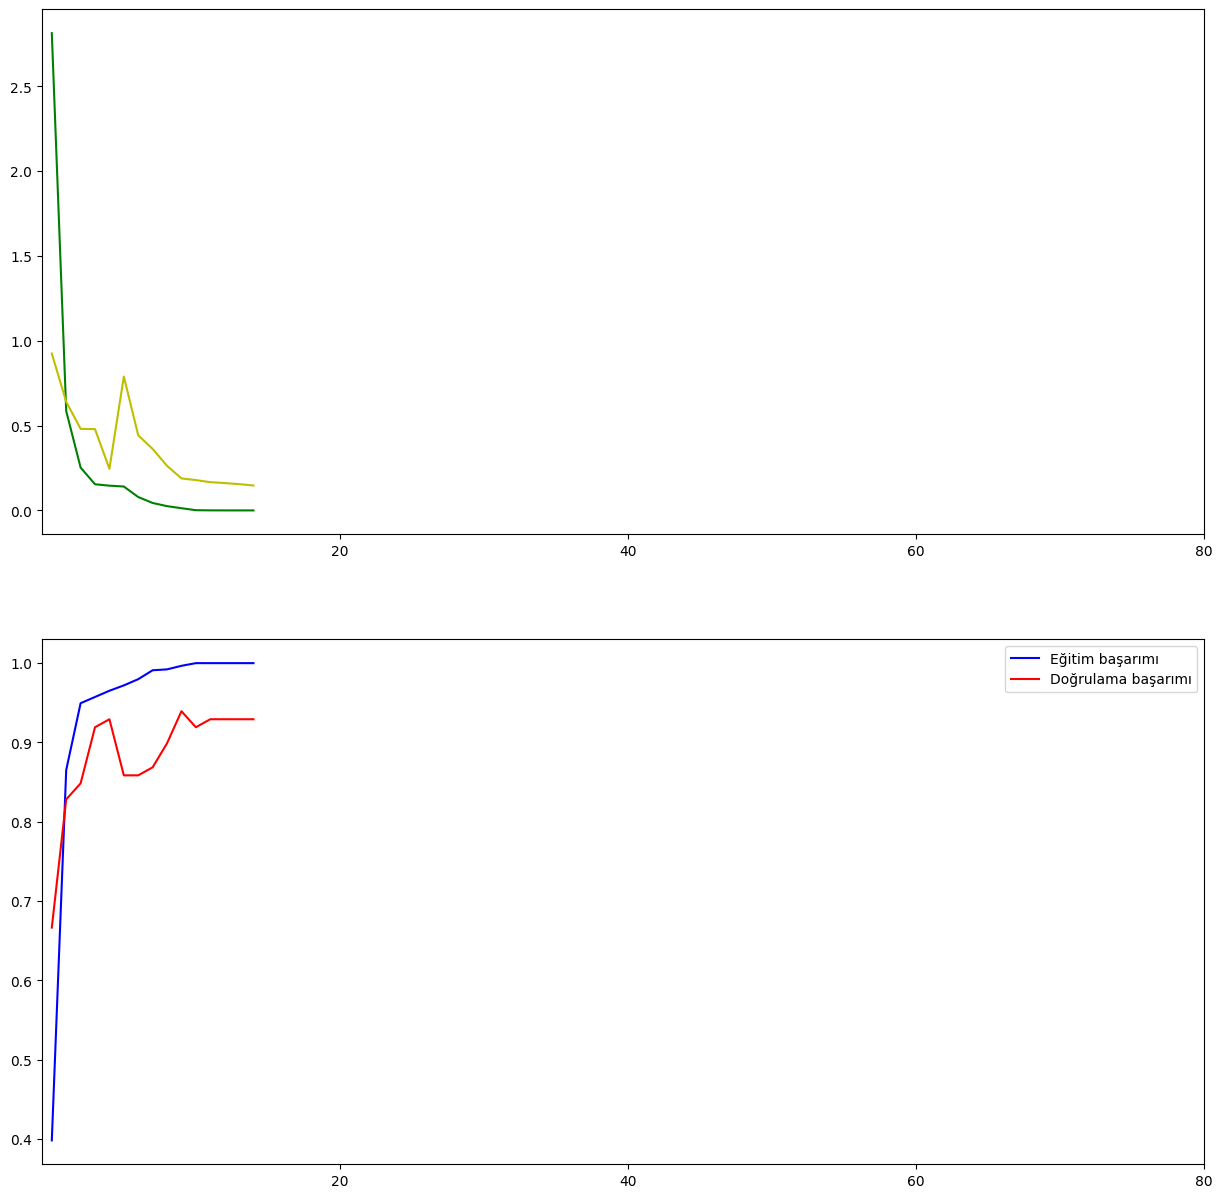

In [37]:
#Degerlerin grafik üzerinde gösterilmesi 
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt. subplots(2, 1, figsize=(15, 15))
ax1.plot(model.history.history['loss'], color='g',label="Eğitim kaybı") 
ax1.plot(model.history.history['val_loss'], color='y', label="Doğrulama kaybı") 
ax1.set_xticks(np.arange (20, 100, 20))
ax2.plot(model.history.history['accuracy'], color='b' , label="Eğitim başarımı")
ax2.plot(model.history.history[ 'val_accuracy'], color='r', label="Doğrulama başarımı") 
ax2.set_xticks(np.arange (20, 100, 20)) 
plt.legend() 
plt.show()